In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
df = pd.read_csv('master.csv')

# List of columns to exclude
exclude = ['Player', 'PTS', 'Draft Team', 'Round', 'Pick', 'Draft Year', 'Draft College', 'Season', 'Team', 'Pos', 'Class', 'yr1.Team', 'yr1.Pos', 'yr2.Team', 'yr2.Pos', 'yr3.Team', 'yr3.Pos']
# Need to discuss POS and whether or not its a feature we want

# Drop the excluded columns
df_selected = df.drop(columns=exclude)

# Create dummy variables for the 'Pos' column
pos_dummies = pd.get_dummies(df['Pos'], prefix='Pos')

# Concatenate the dummy variables with the selected features
df_selected = pd.concat([df_selected, pos_dummies], axis=1)

# Handle missing values, fill with -1 to distinguish not playing
df_selected = df_selected.fillna(-1)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

/opt/miniconda3/envs/new_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/new_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/new_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/new_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

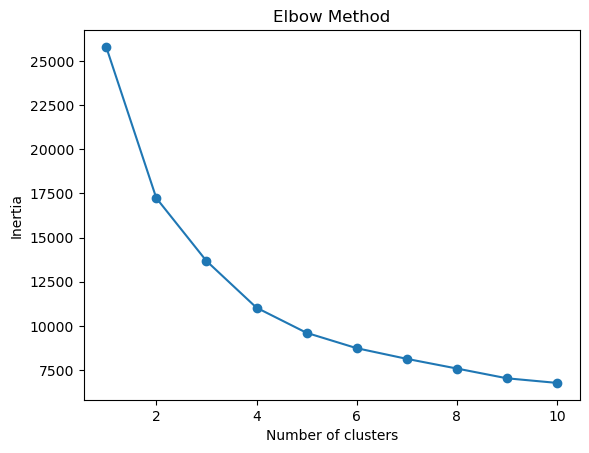

In [4]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/opt/miniconda3/envs/new_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


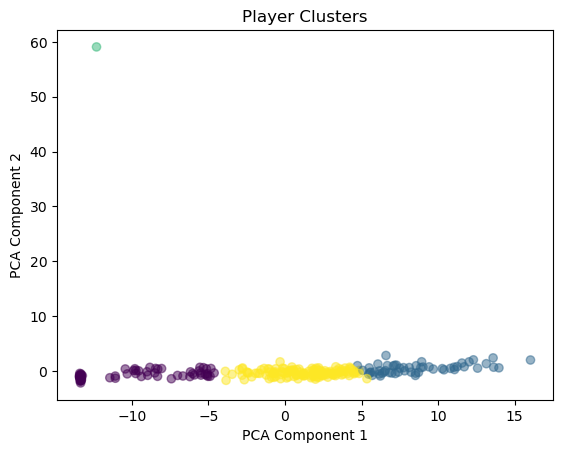

In [5]:
# Based on the Elbow Method, choose a number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Player Clusters')
plt.show()

# Analyze cluster centers
# cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
# cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
# print(cluster_centers_df)